# `Simple linear regression model with 1 Feature`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy, math

In [2]:
x_train = np.array([1.0, 1.5, 2.0, 2.7, 3.0])
y_train = np.array([250.0, 400.0, 500.0, 610.0, 700.0])

m = x_train.shape[0]

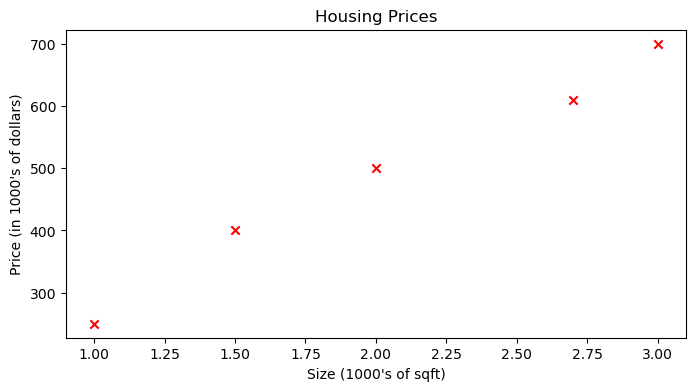

In [3]:
plt.figure(figsize=(8, 4))
plt.scatter(x_train, y_train, marker='x', c='r')
plt.title("Housing Prices")
plt.ylabel("Price (in 1000's of dollars)")
plt.xlabel("Size (1000's of sqft)")
plt.show()

##### $$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

In [4]:
def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b
    return f_wb

##### $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

In [5]:
def compute_cost(x, y, w, b): 
    m = x.shape[0] 
    
    cost_sum = 0 
    for i in range(m): 
        f_wb = w * x[i] + b   
        cost = (f_wb - y[i]) ** 2  
        cost_sum = cost_sum + cost  
    total_cost = (1 / (2 * m)) * cost_sum  

    return total_cost

##### $$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)}\\\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})\\
\end{align}
$$

In [6]:
def compute_gradient(x, y, w, b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

In [7]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, compute_gradient):
    w = copy.deepcopy(w_in)
    J_history = []
    p_history = []
    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        
        b = b - alpha * dj_db
        w = w - alpha * dj_dw
        
        if i<1000000:
            J_history.append( cost_function(x, y, w, b))
            p_history.append([w,b])

        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i}: Cost {J_history[-1]:.3f} ",
                  f"dj_dw: {dj_dw:.3f}, dj_db: {dj_db:.3f} ",
                  f"w: {w:.3f}, b:{b:.3f}")
    return w, b, J_history, p_history

In [8]:
def r2_score(y, y_pred):
    y = np.array(y)
    y_pred = np.array(y_pred)
    ss_total = np.sum((y - np.mean(y)) ** 2)
    ss_residual = np.sum((y - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

In [9]:
w_init = 0
b_init = 0

iterations = 10000
tmp_alpha = 1.0e-2

w_final, b_final, J_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)

print(f"(w,b) found by gradient descent: ({w_final:8.4f}, {b_final:8.4f})")

Iteration 0: Cost 118928.221  dj_dw: -1119.400, dj_db: -492.000  w: 11.194, b:4.920
Iteration 1000: Cost 180.644  dj_dw: -0.459, dj_db: 1.037  w: 207.077, b:70.599
Iteration 2000: Cost 174.988  dj_dw: -0.173, dj_db: 0.392  w: 210.009, b:63.973
Iteration 3000: Cost 174.182  dj_dw: -0.065, dj_db: 0.148  w: 211.115, b:61.472
Iteration 4000: Cost 174.067  dj_dw: -0.025, dj_db: 0.056  w: 211.533, b:60.528
Iteration 5000: Cost 174.051  dj_dw: -0.009, dj_db: 0.021  w: 211.691, b:60.172
Iteration 6000: Cost 174.049  dj_dw: -0.004, dj_db: 0.008  w: 211.750, b:60.038
Iteration 7000: Cost 174.048  dj_dw: -0.001, dj_db: 0.003  w: 211.773, b:59.987
Iteration 8000: Cost 174.048  dj_dw: -0.001, dj_db: 0.001  w: 211.781, b:59.968
Iteration 9000: Cost 174.048  dj_dw: -0.000, dj_db: 0.000  w: 211.784, b:59.960
(w,b) found by gradient descent: (211.7855,  59.9577)


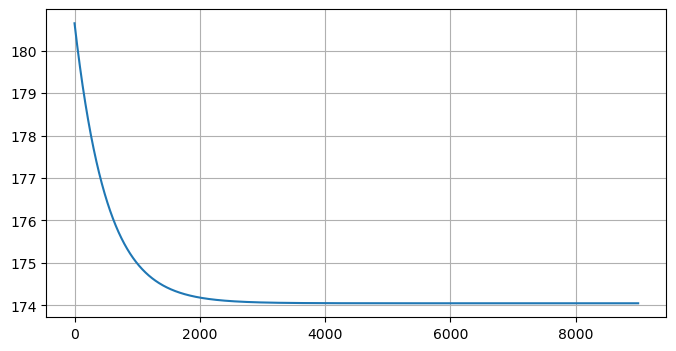

In [10]:
plt.figure(figsize=(8, 4))
plt.plot(J_hist[1000:])
plt.grid(True)

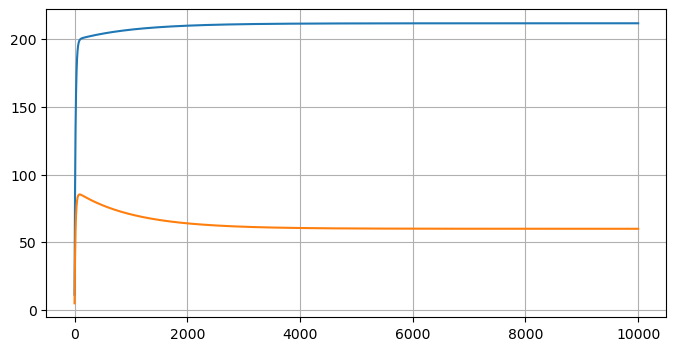

In [11]:
plt.figure(figsize=(8, 4))
plt.plot(p_hist)
plt.grid(True)

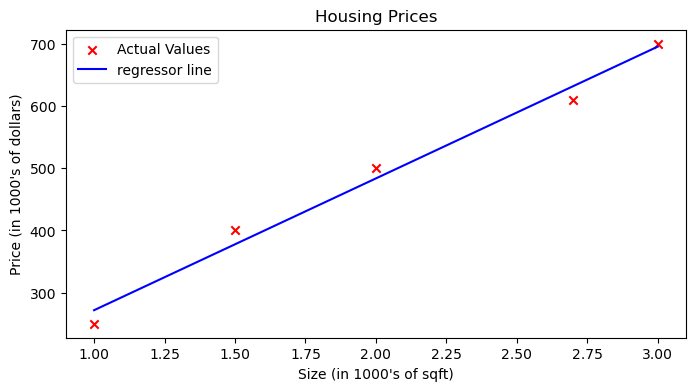

In [12]:
f_wb = compute_model_output(x_train, w_final, b_final)

plt.figure(figsize=(8, 4))
plt.scatter(x_train, y_train, marker='x', c='r', label="Actual Values")
plt.plot(x_train, f_wb, c='b', label="regressor line")

plt.title("Housing Prices")
plt.ylabel("Price (in 1000's of dollars)")
plt.xlabel("Size (in 1000's of sqft)")
plt.legend()
plt.show()

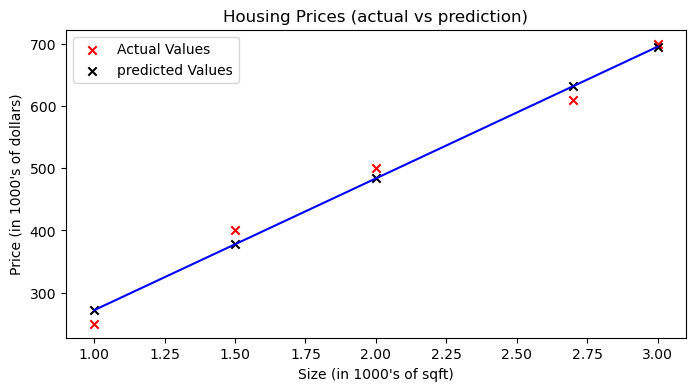

In [13]:
pred = []
for i in range(len(x_train)):
    tmp_f_wb = w_final * x_train[i] + b_final
    pred.append(tmp_f_wb)
    

plt.figure(figsize=(8, 4))
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values')
plt.scatter(x_train, pred, marker='x', c='k', label='predicted Values', )
plt.plot(x_train, f_wb, c='b')

plt.title('Housing Prices (actual vs prediction)')
plt.ylabel("Price (in 1000's of dollars)")
plt.xlabel("Size (in 1000's of sqft)")
plt.legend()
plt.show()

In [14]:
r2 = r2_score(y_train, pred)
print(f"R² Score: {r2:.5f}")

R² Score: 0.98600
